In [1]:
# Let's import the modules
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading the demand file (previously downloaded via REE API)
RAW = pd.read_csv('REE_demanda_real.csv')
RAW.head(2)

,datetime_utc,demanda,datetime_CET
0,2013-12-31T23:00:00Z,24546.0,2014-01-01 00:00
1,2013-12-31T23:10:00Z,24309.0,2014-01-01 00:10


In [4]:
# We select the fields of interest and we rename them
DEM = RAW[['datetime_CET','demanda']]
DEM.columns = ['date','demand']

In [5]:
# We add datetime properties to the date column and set it as index
DEM.loc[:,'date'] = pd.DatetimeIndex(pd.to_datetime(DEM['date']))
DEM.set_index(['date'],inplace=True)

In [6]:
# Let's create some fields of interest
DEM.loc[:,'weekday'] = DEM.index.strftime('%a')
DEM.loc[:,'month']   = DEM.index.strftime('%b')
DEM.loc[:,'HHMM']    = DEM.index.strftime('%H:%M')
DEM.head()

,demand,weekday,month,HHMM
date,,,,
2014-01-01 00:00:00,24546.0,Wed,Jan,00:00
2014-01-01 00:10:00,24309.0,Wed,Jan,00:10
2014-01-01 00:20:00,24348.0,Wed,Jan,00:20
2014-01-01 00:30:00,24321.0,Wed,Jan,00:30
2014-01-01 00:40:00,24194.0,Wed,Jan,00:40


Python's strftime directives
===============================

### Note: Examples are based on datetime.datetime(2013, 9, 3, 7, 6, 5)

+ **%a**    : **Mon** Weekday as locale’s abbreviated name.
+ **%A** 	: **1** Weekday as a decimal number, where 0 is Sunday and 6 is Saturday.
+ **%d** 	: **03** Day of the month as a zero-padded decimal number.
+ **%-d** 	: **3** Day of the month as a decimal number. (Platform specific).
+ **%b** 	: **Sep** Month as locale’s abbreviated name. 					
+ **%B** 	: **September** Month as locale’s full name.
+ **%m** 	: **09** Month as a zero-padded decimal number.
+ **%-m** 	: **9** Month as a decimal number. (Platform specific) 	
+ **%y** 	: **13** Year without century as a zero-padded decimal number.
+ **%Y** 	: **2013** Year with century as a decimal number. 	
+ **%H** 	: **07** Hour (24-hour clock) as a zero-padded decimal number.
+ **%-H** 	: **7** Hour (24-hour clock) as a decimal number. (Platform specific)
+ **%I** 	: **07** Hour (12-hour clock) as a zero-padded decimal number.
+ **%-I** 	: **7** Hour (12-hour clock) as a decimal number. (Platform specific)
+ **%p** 	: **AM** Locale’s equivalent of either AM or PM.
+ **%M** 	: **06** Minute as a zero-padded decimal number.
+ **%-M** 	: **6** Minute as a decimal number. (Platform specific)
+ **%S** 	: **05** Second as a zero-padded decimal number.
+ **%-S** 	: **5** Second as a decimal number. (Platform specific)
+ **%f** 	: **000000** Microsecond as a decimal number, zero-padded on the left.
+ **%j**	: **073** Day of the year as a zero-padded decimal number. 
+ **%-j** 	: **73** Day of the year as a decimal number. (Platform specific)
+ **%c** 	: **Mon Sep 30 07:06:05 2013** Locale’s appropriate date and time representation.
+ **%x** 	: **09/30/13** Locale’s appropriate date representation. 
+ **%X** 	: **07:06:05** Locale’s appropriate time representation.
+ **%%** 	: **%** A literal '%' character.
+ **%U** 	: **39** Week number of the year (Sunday as the first day of the week) as a zero padded decimal number. All days in a new year preceding the first Sunday are considered to be in week 0. 	
+ **%W** 	: **39**	Week number of the year (Monday as the first day of the week) as a decimal number. All days in a new year preceding the first Monday are considered to be in week 0.
+ **%Z** 	: Time zone name (empty string if the object is naive). 	
+ **%z** 	: UTC offset in the form +HHMM or -HHMM (empty string if the the object is naive).

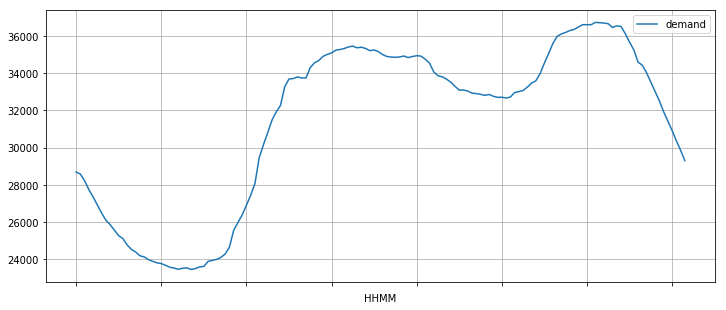

In [7]:
# Average day (simple plot)
month = 'Jan' ; weekday = 'Wed' 

SEL = DEM.loc[(DEM['weekday'] == weekday) & (DEM['month'] == month)]

# Group-by
GB = SEL.groupby('HHMM')

fig, ax = plt.subplots(figsize=(12,5))
GB.mean().plot(ax=ax)
ax.grid()

In [8]:
from matplotlib import dates

In [9]:
TMP = GB.mean()
TMP.index = pd.DatetimeIndex(pd.to_datetime(TMP.index))

In [10]:
TMP.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 2019-01-28 00:00:00 to 2019-01-28 23:50:00
Data columns (total 1 columns):
demand    144 non-null float64
dtypes: float64(1)
memory usage: 2.2 KB


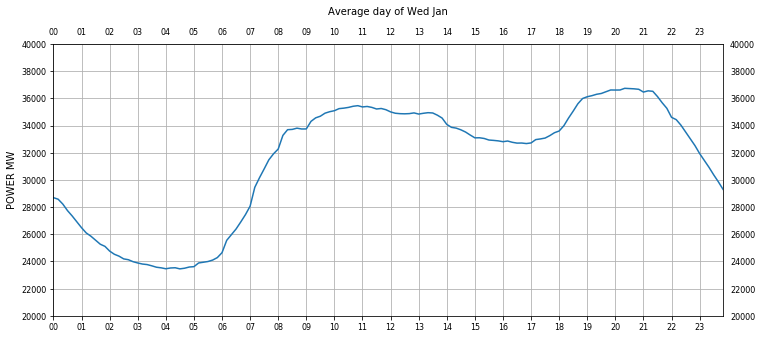

In [11]:
# Plot with some extra feeatures
fontsize = 10
fig, ax = plt.subplots(1,1,figsize=(12,5))


hours = dates.HourLocator(interval=1)
ax.xaxis.set_major_locator(hours)
hfmt = dates.DateFormatter('%H')
ax.xaxis.set_major_formatter(hfmt)
ax.tick_params(axis='x', which = 'major', labelsize=fontsize-2, labeltop=True)
ax.set_xlim((TMP.index.values[0],TMP.index.values[-1]))

ax.set_ylabel('POWER MW',fontsize=fontsize)
ax.set_ylim((20000,40000))
ax.set_yticks(np.arange(20000,42000,2000))
ax.tick_params(axis='y',labelsize=fontsize-2,labelright=True)
            
ax.grid()
plt.title('Average day of %s %s\n\n' % (weekday,month),fontsize=fontsize)
ax.plot(TMP)

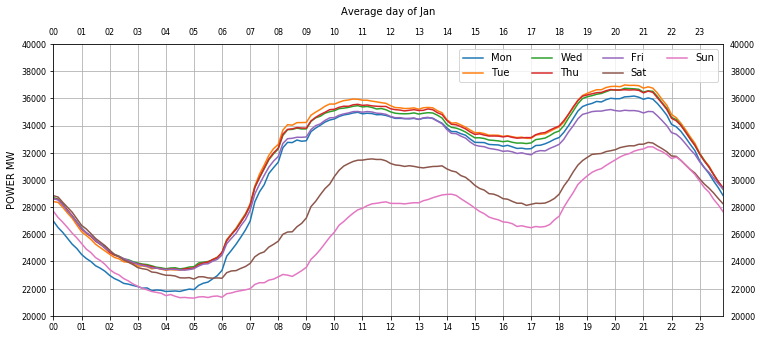

In [12]:
# All average day in a single plot
fontsize = 10
fig, ax = plt.subplots(1,1,figsize=(12,5))

month = 'Jan'

hours = dates.HourLocator(interval=1)
ax.xaxis.set_major_locator(hours)
hfmt = dates.DateFormatter('%H')
ax.xaxis.set_major_formatter(hfmt)
ax.tick_params(axis='x', which = 'major', labelsize=fontsize-2, labeltop=True)
ax.set_xlim((TMP.index.values[0],TMP.index.values[-1]))

ax.set_ylabel('POWER MW',fontsize=fontsize)
ax.set_ylim((20000,40000))
ax.set_yticks(np.arange(20000,42000,2000))
ax.tick_params(axis='y',labelsize=fontsize-2,labelright=True)
            
ax.grid()
plt.title('Average day of %s\n\n' % (month),fontsize=fontsize)
for weekday in ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']:
    SEL = DEM.loc[(DEM['weekday'] == weekday) & (DEM['month'] == month)]
    GB = SEL.groupby('HHMM')
    TMP = GB.mean()
    TMP.index = pd.DatetimeIndex(pd.to_datetime(TMP.index))    
    ax.plot(TMP,label=weekday)
plt.legend(ncol=4)    

Task
===========
Create a subplot with hourly demand for all 12 months